In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [8]:
# 1. Load the dataset
df = pd.read_csv('/content/HousingData.csv')

In [9]:
# 2. Explore the dataset
print("\nFirst five rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())


First five rows:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4 


Missing values:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


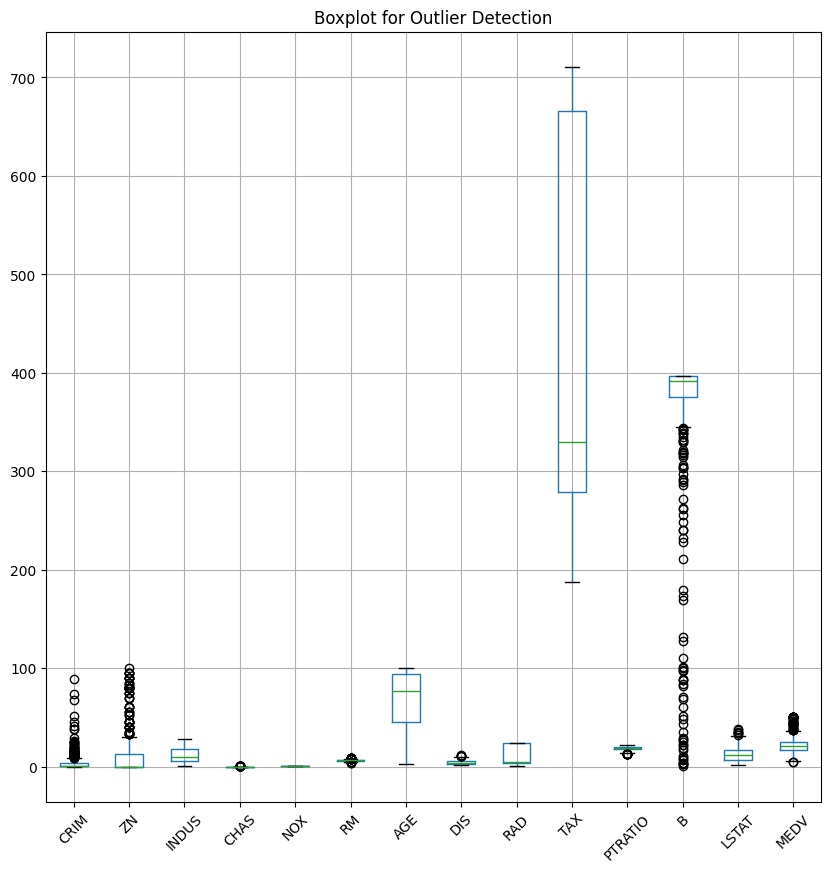

In [10]:
# 3. Check for missing values and outliers
print("\nMissing values:")
print(df.isnull().sum())

plt.figure(figsize=(10, 10))
df.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [11]:
# Handle missing values: fill with median (robust to outliers)
df.fillna(df.median(), inplace=True)

In [12]:
# Outlier detection using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [13]:
# Define lower and upper bounds for acceptable data
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Option 2: Cap outliers to upper and lower bounds
df = df.clip(lower=lower_bound, upper=upper_bound, axis=1)

In [14]:
# Duplicates
df.duplicated().sum()

np.int64(0)

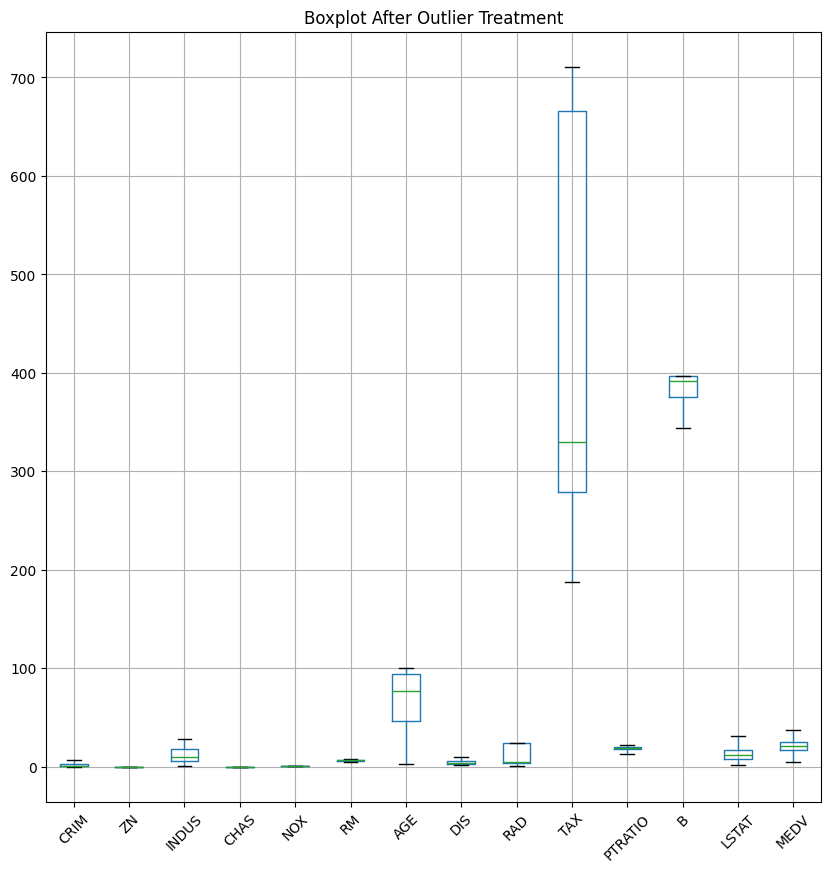

In [15]:
# Boxplot to visualize the data after treatment
plt.figure(figsize=(10, 10))
df.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot After Outlier Treatment")
plt.show()


Simple Linear Regression Evaluation:
R^2 Score: 0.40884883474070455
MAE: 3.880506773963607
RMSE: 5.377921644475372


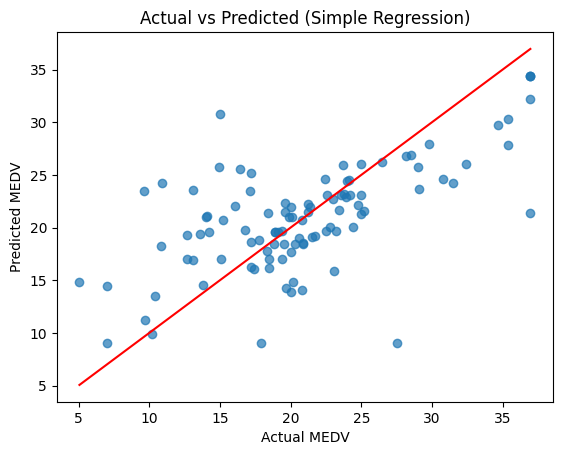

In [18]:
# 5. Simple Linear Regression with 'RM' as predictor
X = df[['RM']]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_simple = LinearRegression()
lr_simple.fit(X_train, y_train)

y_pred_simple = lr_simple.predict(X_test)

print("\nSimple Linear Regression Evaluation:")
print("R^2 Score:", r2_score(y_test, y_pred_simple))
print("MAE:", mean_absolute_error(y_test, y_pred_simple))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_simple)))

plt.scatter(y_test, y_pred_simple, alpha=0.7)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted (Simple Regression)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.show()

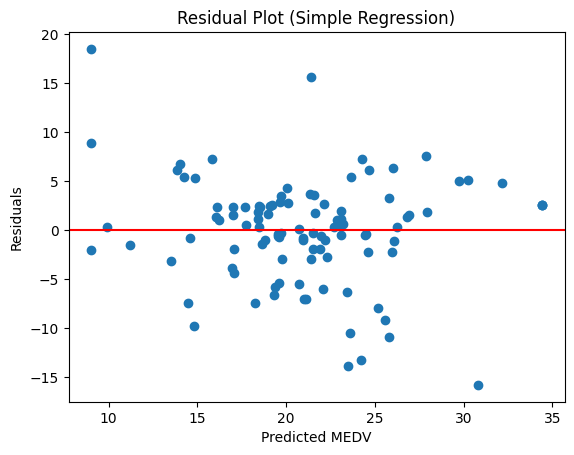

In [19]:
residuals = y_test - y_pred_simple
plt.scatter(y_pred_simple, residuals)
plt.axhline(0, color='red')
plt.title("Residual Plot (Simple Regression)")
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.show()


Top 5 correlated features with MEDV: ['LSTAT', 'RM', 'INDUS', 'TAX', 'PTRATIO']

Multiple Linear Regression Evaluation:
R^2 Score: 0.7153971849261083
MAE: 2.577355379124513
RMSE: 3.7315115573746294


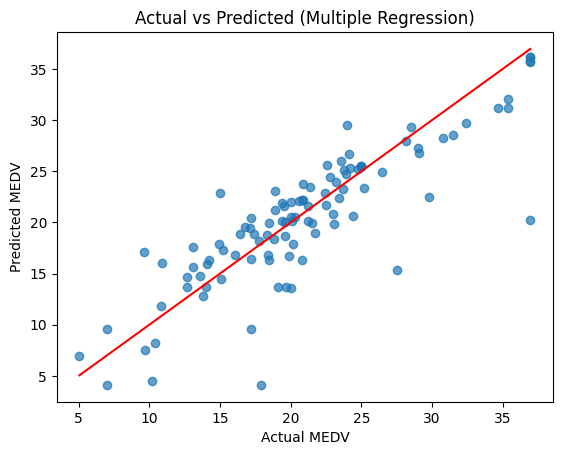

In [20]:
# 6. Multiple Linear Regression with top 5 correlated features
corr_matrix = df.corr()
top_features = corr_matrix['MEDV'].abs().sort_values(ascending=False)[1:6].index.tolist()
print("\nTop 5 correlated features with MEDV:", top_features)

X_multi = df[top_features]
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

lr_multi = LinearRegression()
lr_multi.fit(X_train_m, y_train_m)

y_pred_multi = lr_multi.predict(X_test_m)

print("\nMultiple Linear Regression Evaluation:")
print("R^2 Score:", r2_score(y_test_m, y_pred_multi))
print("MAE:", mean_absolute_error(y_test_m, y_pred_multi))
print("RMSE:", np.sqrt(mean_squared_error(y_test_m, y_pred_multi)))

plt.scatter(y_test_m, y_pred_multi, alpha=0.7)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted (Multiple Regression)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.show()


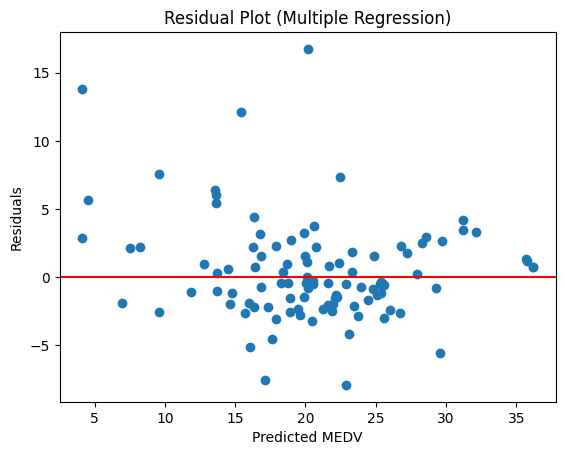

In [21]:
residuals_multi = y_test_m - y_pred_multi
plt.scatter(y_pred_multi, residuals_multi)
plt.axhline(0, color='red')
plt.title("Residual Plot (Multiple Regression)")
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.show()

In [27]:
# 7. Conclusion and Model Comparison
r2_simple = r2_score(y_test, y_pred_simple)
mae_simple = mean_absolute_error(y_test, y_pred_simple)
rmse_simple = np.sqrt(mean_squared_error(y_test, y_pred_simple))

r2_multi = r2_score(y_test_m, y_pred_multi)
mae_multi = mean_absolute_error(y_test_m, y_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test_m, y_pred_multi))

print(f"Simple Linear Regression (RM):")
print(f"  R² Score: {r2_simple:.3f}")
print(f"  MAE: {mae_simple:.2f}")
print(f"  RMSE: {rmse_simple:.2f}\n")

print(f"Multiple Linear Regression (Top 5 Features):")
print(f"  R² Score: {r2_multi:.3f}")
print(f"  MAE: {mae_multi:.2f}")
print(f"  RMSE: {rmse_multi:.2f}\n")

# CONCLUSIONS:
#- The Multiple Linear Regression using the top 5 correlated features significantly improves the prediction accuracy, increasing R² and lowering error metrics (MAE, RMSE).
#- This confirms that housing prices are influenced by multiple factors, and using more relevant features leads to a better and more reliable model.
#- Residual plots indicate that the multiple regression model has more stable and randomly distributed errors, suggesting a better fit.

Simple Linear Regression (RM):
  R² Score: 0.409
  MAE: 3.88
  RMSE: 5.38

Multiple Linear Regression (Top 5 Features):
  R² Score: 0.715
  MAE: 2.58
  RMSE: 3.73

